# Real Estate Price Prediction Project
## Preprocessing 1
### Import libraries

In [304]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [305]:
df = pd.read_csv('Bengaluru_House_Data.csv')
print(df.shape)
df.head()

(13320, 9)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [306]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [307]:
df.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [308]:
print(len(df.location.value_counts()))
print(len(df.society.value_counts()))

1305
2688


<AxesSubplot:>

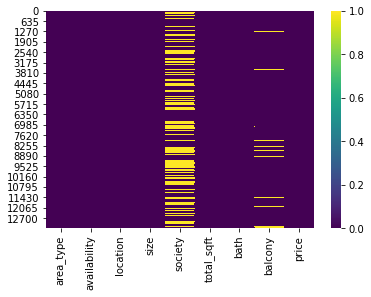

In [309]:
sns.heatmap(df.isna(), cmap='viridis')

In [310]:
print(df.society.isna().sum())
print(df.balcony.isna().sum())

5502
609


### Data Cleaning

In [311]:
df0 = df.drop(['area_type','availability','society','balcony'], axis=1)
df0.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [312]:
df0.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [313]:
#Drop NaN values
df0 = df0.dropna()
df0.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

#### Converting Lakh ₹ to USD $

In [314]:
def lakh_to_usd(n):
    currency = 11089.55
    return round(n*currency,2)

In [315]:
df0.price = df0.price.apply(lakh_to_usd)

In [316]:
df0.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,433268.72
1,Chikka Tirupathi,4 Bedroom,2600,5.0,1330746.00
2,Uttarahalli,3 BHK,1440,2.0,687552.10
3,Lingadheeranahalli,3 BHK,1521,3.0,1053507.25
4,Kothanur,2 BHK,1200,2.0,565567.05


#### Converting Square Foot to Meter

In [317]:
def sqft_to_meter(n):
    n = float(n)
    return round(n/10.764,2)

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

def sqft_to_float(x):
    tokens = []
    if type(x) != type(float()):
        tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [318]:
df0[~df0.total_sqft.apply(is_float)]

,location,size,total_sqft,bath,price
30,Yelahanka,4 BHK,2100 - 2850,4.0,2062656.30
122,Hebbal,4 BHK,3067 - 8156,4.0,5289715.35
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,598891.15
165,Sarjapur,2 BHK,1145 - 1340,2.0,482284.53
188,KR Puram,2 BHK,1015 - 1540,2.0,629886.44
...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,423509.91
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,1352925.10
13059,Harlur,2 BHK,1200 - 1470,2.0,806875.66
13265,Hoodi,2 BHK,1133 - 1384,2.0,655780.54


In [319]:
df0.total_sqft = df0.total_sqft.apply(sqft_to_float)
df0 = df0.dropna()
df0.bath = df0.bath.apply(lambda x: int(x))

In [320]:
df0['total_sqmeter'] = df0.total_sqft.apply(sqft_to_meter)
df1 = df0.copy()
cols = df1.columns.tolist()
cols = cols[:2] + cols[-1:] + cols[3:5]
df1 = df1[cols]
df1.head()

,location,size,total_sqmeter,bath,price
0,Electronic City Phase II,2 BHK,98.10,2,433268.72
1,Chikka Tirupathi,4 Bedroom,241.55,5,1330746.00
2,Uttarahalli,3 BHK,133.78,2,687552.10
3,Lingadheeranahalli,3 BHK,141.30,3,1053507.25
4,Kothanur,2 BHK,111.48,2,565567.05


In [321]:
print(df1['size'].unique())

['2 BHK' '4 Bedroom' '3 BHK' '4 BHK' '6 Bedroom' '3 Bedroom' '1 BHK'
 '1 RK' '1 Bedroom' '8 Bedroom' '2 Bedroom' '7 Bedroom' '5 BHK' '7 BHK'
 '6 BHK' '5 Bedroom' '11 BHK' '9 BHK' '9 Bedroom' '27 BHK' '10 Bedroom'
 '11 Bedroom' '10 BHK' '19 BHK' '16 BHK' '43 Bedroom' '14 BHK' '8 BHK'
 '12 Bedroom' '13 BHK' '18 Bedroom']


In [322]:
df1['size'] = df1['size'].apply(lambda x: int(x.split(' ')[0]))

In [323]:
df1.rename(columns={'size':'BHK'}, inplace=True)
print(df1.shape)
df1.head(10)

(13200, 5)


,location,BHK,total_sqmeter,bath,price
0,Electronic City Phase II,2,98.10,2,433268.72
1,Chikka Tirupathi,4,241.55,5,1330746.00
2,Uttarahalli,3,133.78,2,687552.10
3,Lingadheeranahalli,3,141.30,3,1053507.25
4,Kothanur,2,111.48,2,565567.05
5,Whitefield,2,108.70,2,421402.90
6,Old Airport Road,4,253.81,4,2262268.20
7,Rajaji Nagar,4,306.58,4,6653730.00
8,Marathahalli,3,121.70,3,701414.04
9,Gandhi Bazar,6,94.76,6,4103133.50


### Feature Engineering

In [324]:
df2 = df1.copy()
#Adding new feature 'price_per_sqmeter'
df2['price_per_sqmeter'] = df2.price/df2.total_sqmeter
df2.head()

,location,BHK,total_sqmeter,bath,price,price_per_sqmeter
0,Electronic City Phase II,2,98.10,2,433268.72,4416.602650
1,Chikka Tirupathi,4,241.55,5,1330746.00,5509.194784
2,Uttarahalli,3,133.78,2,687552.10,5139.423681
3,Lingadheeranahalli,3,141.30,3,1053507.25,7455.819179
4,Kothanur,2,111.48,2,565567.05,5073.260226


In [353]:
print(len(df2.location.unique()))
df2.location.value_counts()

1298


Whitefield                            532
Sarjapur  Road                        392
Electronic City                       302
Kanakpura Road                        264
Thanisandra                           232
                                     ... 
CHIKKATIRUPATHI                         1
SARJAPUR BAGALUR ROAD                   1
Kengeri Satellite Town ( BDA SITE)      1
Muthyala Nagar                          1
Vidyapeeta                              1
Name: location, Length: 1298, dtype: int64

In [354]:
locations_stats = df2['location'].value_counts()
#Reducing the number of location by grouping the locations counted less than 10 times
locations_stats_less_than_10 = locations_stats[locations_stats<=10]
len(locations_stats_less_than_10)

1058

In [355]:
df2.location = df2.location.apply(lambda x: 'other' if x in locations_stats_less_than_10 else x)
len(df2.location.unique())

241

In [358]:
df2.head(10)

,location,BHK,total_sqmeter,bath,price,price_per_sqmeter
0,Electronic City Phase II,2,98.10,2,433268.72,4416.602650
1,Chikka Tirupathi,4,241.55,5,1330746.00,5509.194784
2,Uttarahalli,3,133.78,2,687552.10,5139.423681
3,Lingadheeranahalli,3,141.30,3,1053507.25,7455.819179
4,Kothanur,2,111.48,2,565567.05,5073.260226
5,Whitefield,2,108.70,2,421402.90,3876.751610
6,Old Airport Road,4,253.81,4,2262268.20,8913.235097
7,Rajaji Nagar,4,306.58,4,6653730.00,21703.079131
8,Marathahalli,3,121.70,3,701414.04,5763.467872
9,other,6,94.76,6,4103133.50,43300.269101
